# Heart Disease Prediction Using Machine Learning

### Core Libraries

In [1]:
# For numerical operations and data handling
import numpy as np
import pandas as pd

### Libraries for Visualization

In [2]:
# For numerical operations and data handling
import matplotlib.pyplot as plt
import seaborn as sns

### Libraries for Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler # For feature scaling (standardization)
from sklearn.preprocessing import Normalizer
from sklearn.metrics import log_loss

### Librarie for Model Selection

In [4]:
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing sets

### Logistic Regression model

In [5]:
from sklearn.linear_model import LogisticRegression

### To Evaluate the performance

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

### loading heart disease dataset

In [7]:
df = pd.read_csv('dataset/heart.csv')

### dataset operations & details

In [8]:
# Print the number of rows and columns in the dataset
print("Size of dataset:", df.shape)

Size of dataset: (303, 14)


In [9]:
df.head()     #Used for printing the head of the dataframe 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Last 5 rows of the dataset.
print(df.tail())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe().T    #Used for understanding the spread in the data

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
# To check for missing values in the dataset.
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Returns the sum of missing values in the dataset.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# Check for duplicated rows in the dataset (True means duplicated)
print(df.duplicated())

# Count the number of duplicated rows in the dataset
df.duplicated().sum()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool


np.int64(1)

In [16]:
# Displays all column names in the dataset.
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
# Check the distribution of values in the 'target' column (target feature)
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

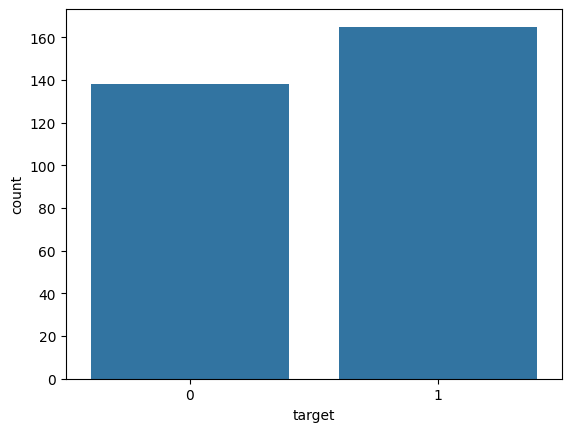

In [18]:
# Plot the count of each class in the 'target' column (0 = No heart disease, 1 = Heart disease)
sns.countplot(x=df['target'])

<Axes: xlabel='sex', ylabel='count'>

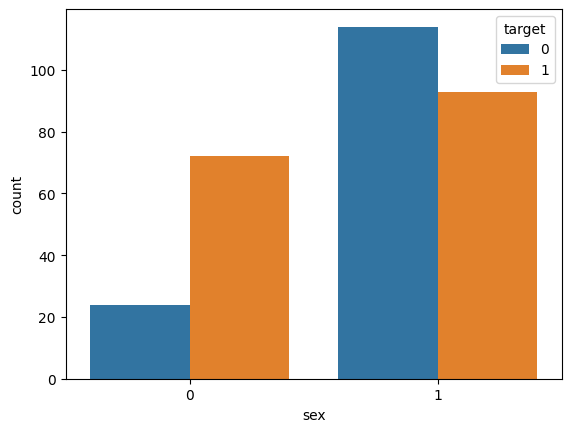

In [19]:
# Plot count of sexes split by heart disease status
sns.countplot(data=df, x='sex', hue='target')


<Axes: >

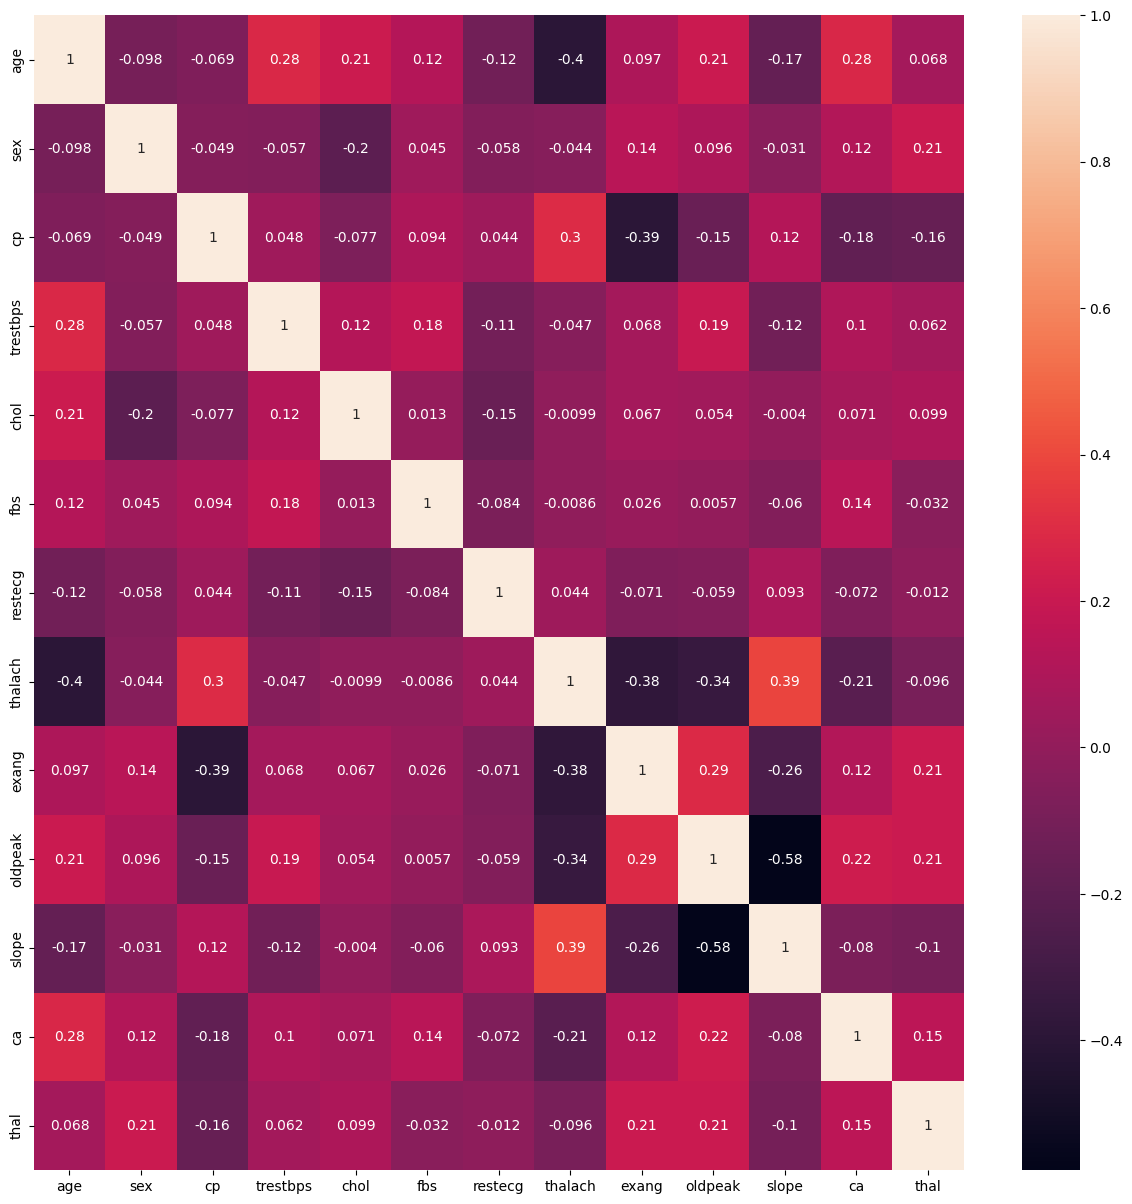

In [20]:
# Plot heatmap of feature correlations (excluding target)
plt.figure(figsize=(15, 15))
sns.heatmap(df.drop(['target'], axis=1).corr(), annot=True)

<Axes: xlabel='age', ylabel='thalach'>

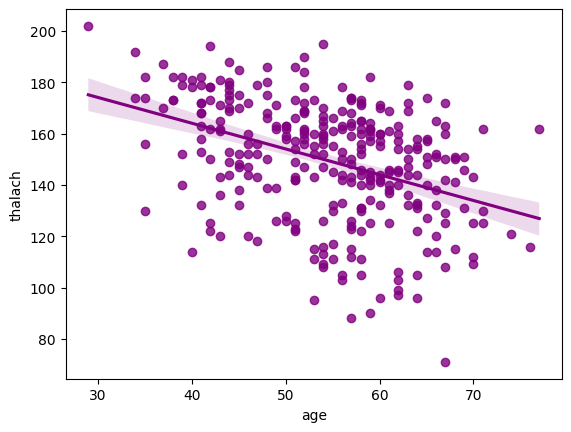

In [21]:
# Create a regression plot with 'age' on the x-axis and 'thalach' on the y-axis, using a red color
sns.regplot(x='age', y='thalach', data=df, color='purple')

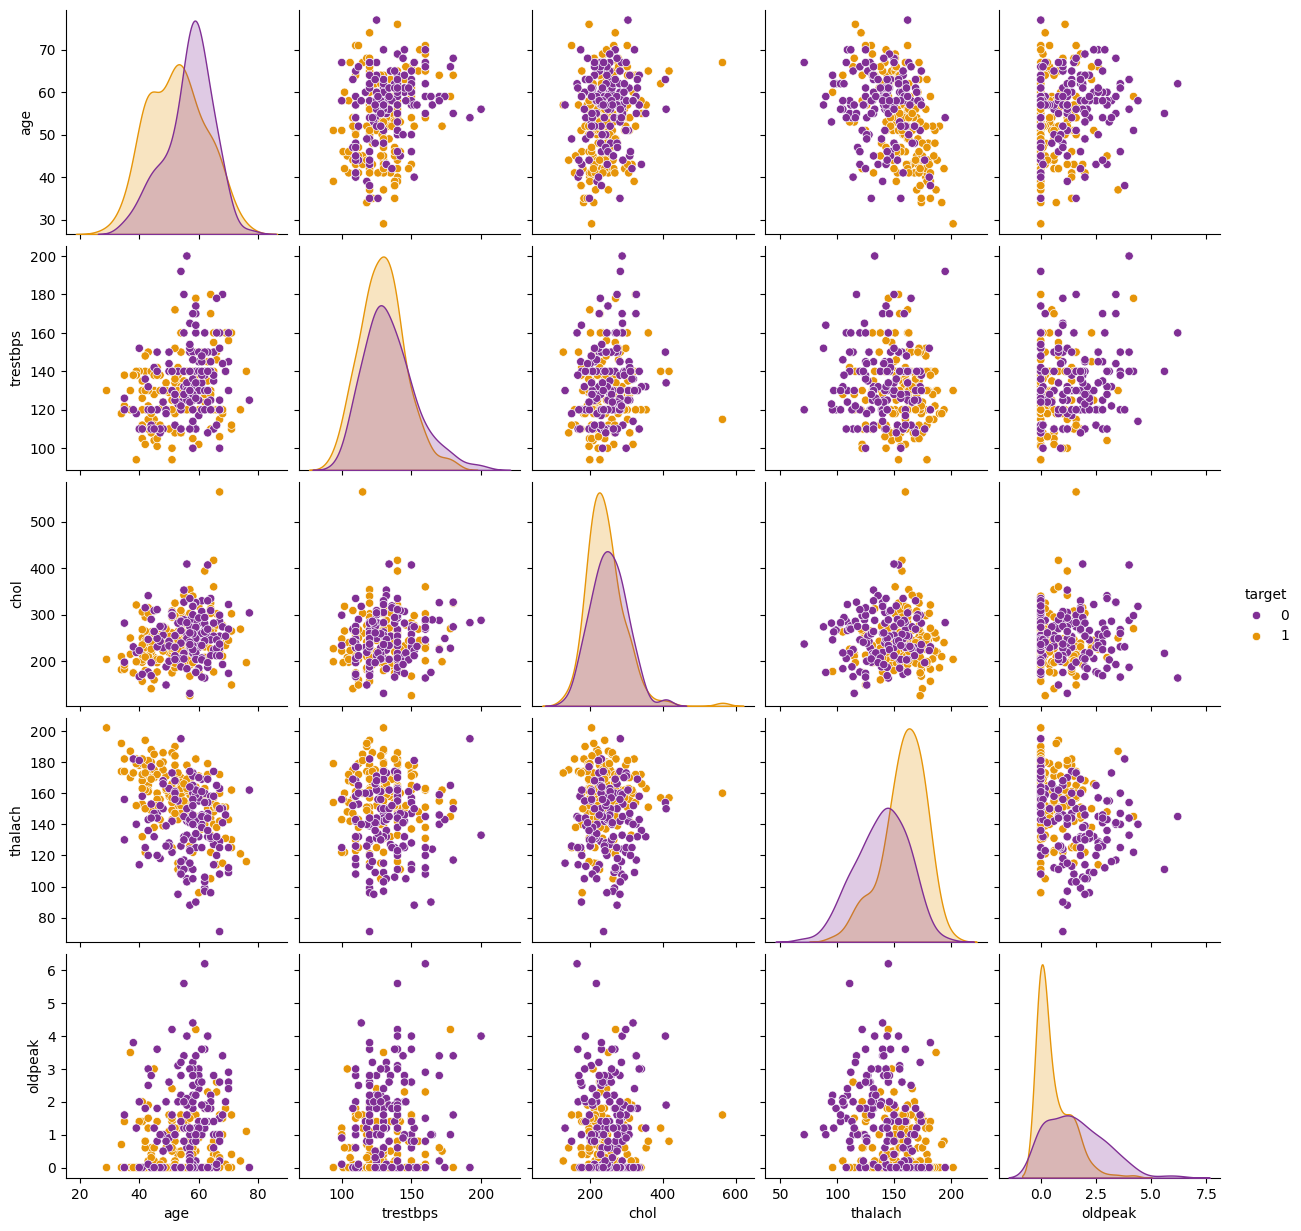

In [22]:
# Create a pairplot of selected features, colored by 'target' with the 'CMRmap' color palette
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette='CMRmap')

<Axes: xlabel='age', ylabel='chol'>

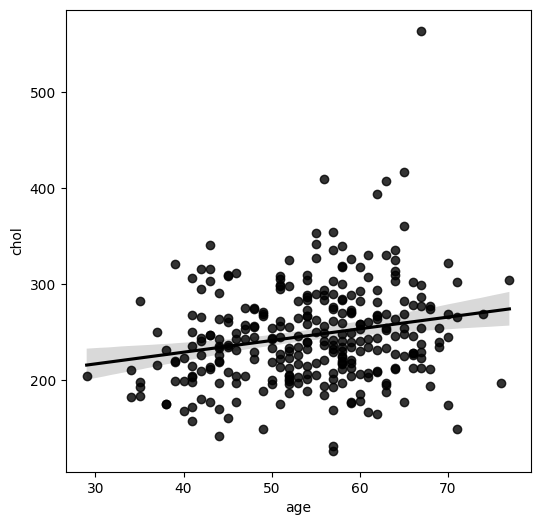

In [23]:
# Set the figure size to 6x6 inches and create a regression plot of 'age' vs 'chol' with a black color
plt.figure(figsize=(6, 6))
sns.regplot(data=df, x='age', y='chol', color='black')

<Axes: xlabel='chol'>

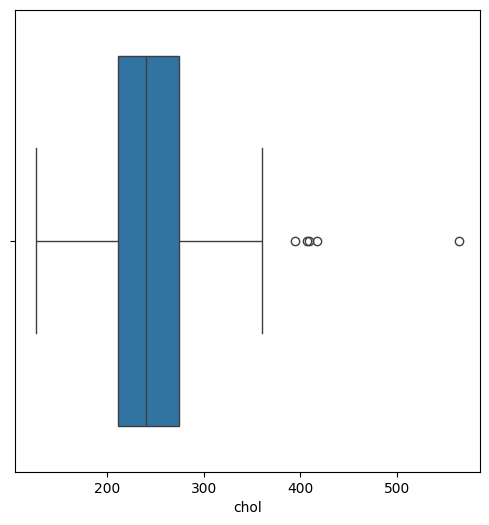

In [24]:
# Set the figure size to 6X6 inches and create a boxplot for the 'chol' column (cholesterol levels)
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='chol')

<Axes: xlabel='thalach'>

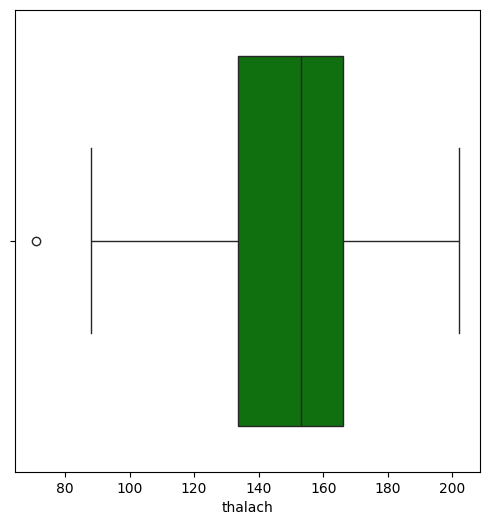

In [25]:
# Set the figure size to 6x6 inches and create a boxplot for the 'thalach' column with green color
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='thalach', color='green')

<Axes: ylabel='age'>

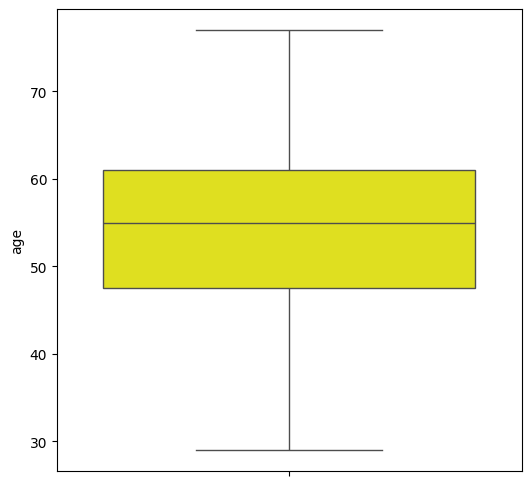

In [26]:
# Set the figure size to 6x6 inches and create a boxplot for the 'age' column with yellow color
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='age', color='yellow')

### Split data into features (X) and target (y)

In [27]:

X = df.drop(['target'], axis=1)  # Features (independent variables)
y = df['target']  # Target variable (dependent variable)

In [28]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [29]:
X_train.shape  # Gives the shape of the training data (features)

(212, 13)

In [30]:
X_test.shape # Gives the shape of the testing data (features)

(91, 13)

In [31]:
# Create empty lists to store evaluation metrics for scaled and normalized data
accuracy_scaled = []               # Stores accuracy values for scaled data
f1_score_scaled = []               # Stores F1 scores for scaled data
precision_score_scaled = []        # Stores precision scores for scaled data
recall_score_scaled = []           # Stores recall scores for scaled data
roc_auc_score_scaled = []          # Stores ROC AUC scores for scaled data
log_loss_scaled = []               # Stores log loss values for scaled data

accuracy_normalized = []           # Stores accuracy values for normalized data
f1_score_normalized = []           # Stores F1 scores for normalized data
precision_score_normalized = []    # Stores precision scores for normalized data
recall_score_normalized = []       # Stores recall scores for normalized data
roc_auc_score_normalized = []      # Stores ROC AUC scores for normalized data
log_loss_normalized = []           # Stores log loss values for normalized data


In [32]:
scaler = StandardScaler()                              #Creating an instance of the StandardScaler()                    
scaler.fit(X_train)                                    #Fitting the input train values 
X_train_scaled = scaler.transform(X_train)             #Transforming the values and storing in X_train_scaled
X_test_scaled = scaler.transform(X_test)               #Transforming the values and storing in X_test_scaled

In [33]:
normalizer = Normalizer()                              #Creating an instance of the Normalizer()
normalizer.fit(X_train)                                #Fitting the input train values
X_train_normalized = normalizer.transform(X_train)     #Transforming the values and storing in X_train_normalized
X_test_normalized = normalizer.transform(X_test)       #Transforming the values and storing in X_test_normalized

### Logistic Regression

In [34]:
# Initialize two Logistic Regression classifiers with the same random state
clf1 = LogisticRegression(random_state = 100)  
clf2 = LogisticRegression(random_state = 100)

# Fit the first Logistic Regression model on scaled training data
clf1.fit(X_train_scaled, y_train)

# Fit the second Logistic Regression model on normalized training data
clf2.fit(X_train_normalized, y_train)

# Make predictions on the scaled test data using clf1
y_test_predict_scaled = clf1.predict(X_test_scaled)

# Make predictions on the normalized test data using clf2
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [35]:
# Store evaluation metrics for scaled data
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))  
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))        
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))  
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))  
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))  
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))  

# Store evaluation metrics for normalized data
accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))  
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))        
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))  
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))  
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))  
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))  


### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf2 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [37]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

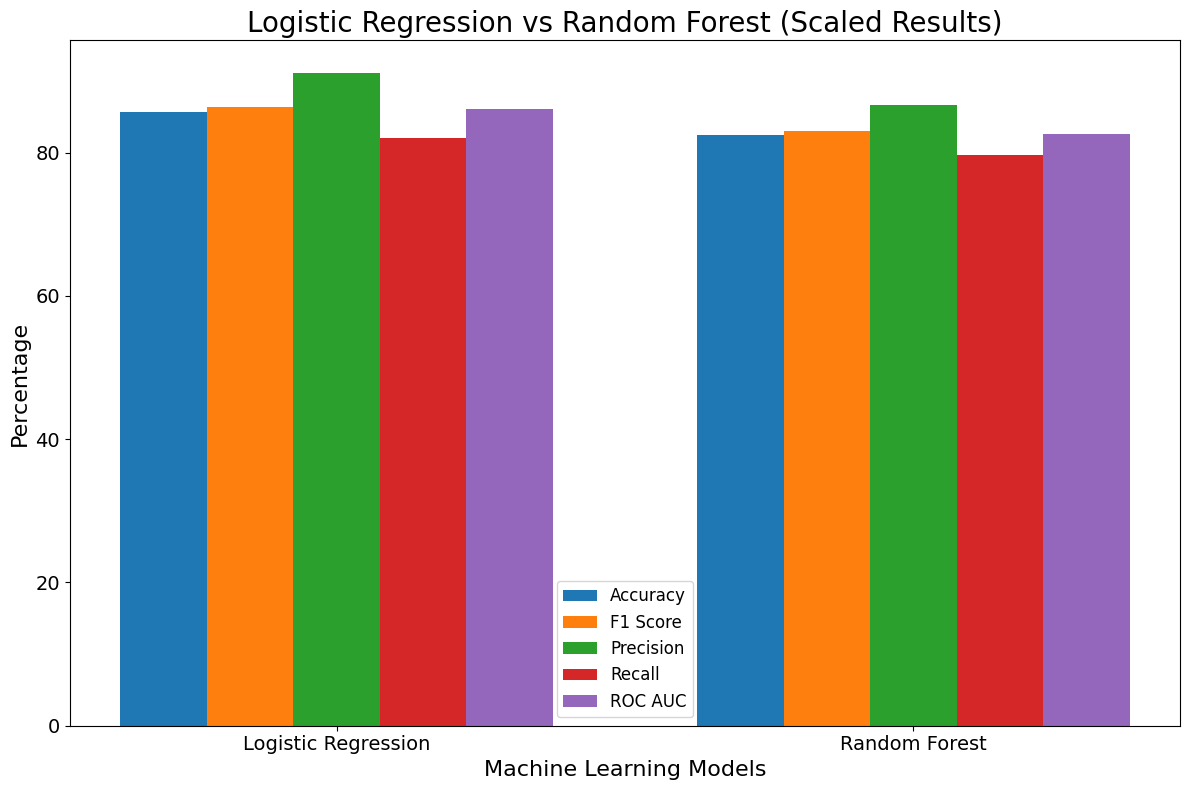

In [38]:
# Get last two results assuming order: [Logistic, Random Forest]
acc = accuracy_scaled[-2:]
f1 = f1_score_scaled[-2:]
prec = precision_score_scaled[-2:]
rec = recall_score_scaled[-2:]
roc = roc_auc_score_scaled[-2:]

models = ['Logistic Regression', 'Random Forest']
x = np.arange(len(models))

plt.figure(figsize=(12, 8))
plt.yticks(fontsize=14)

plt.bar(x, [i * 100 for i in acc], width=0.15)
plt.bar(x + 0.15, [i * 100 for i in f1], width=0.15)
plt.bar(x + 0.30, [i * 100 for i in prec], width=0.15)
plt.bar(x + 0.45, [i * 100 for i in rec], width=0.15)
plt.bar(x + 0.60, [i * 100 for i in roc], width=0.15)

plt.legend(['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'], fontsize=12)
plt.xticks(x + 0.30, models, fontsize=14)
plt.xlabel('Machine Learning Models', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Logistic Regression vs Random Forest (Scaled Results)', fontsize=20)
plt.tight_layout()
plt.show()


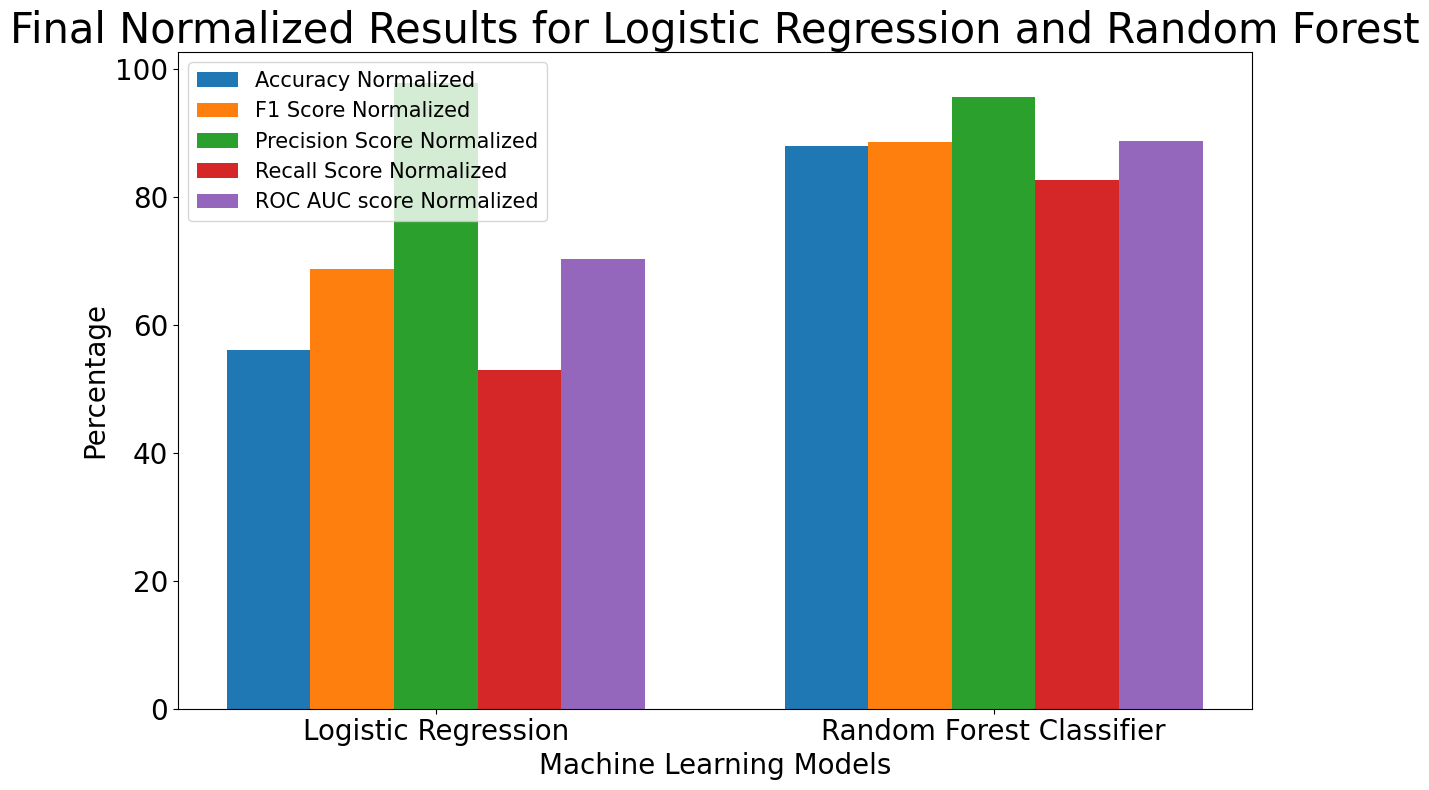

In [39]:
# Models to plot: Logistic Regression and Random Forest only
models = ['Logistic Regression', 'Random Forest Classifier']
models_indices = np.arange(len(models))  # Positions for the models

plt.figure(figsize=(12, 8))  # Adjusted figure size for 2 models
plt.yticks(fontsize=20)

# Bar plots for each metric (multiplied by 100 for percentage)
plt.bar(models_indices, [i * 100 for i in accuracy_normalized[-2:]], width=0.15)
plt.bar(models_indices + 0.15, [i * 100 for i in f1_score_normalized[-2:]], width=0.15)
plt.bar(models_indices + 0.30, [i * 100 for i in precision_score_normalized[-2:]], width=0.15)
plt.bar(models_indices + 0.45, [i * 100 for i in recall_score_normalized[-2:]], width=0.15)
plt.bar(models_indices + 0.60, [i * 100 for i in roc_auc_score_normalized[-2:]], width=0.15)

# Add legend
plt.legend(['Accuracy Normalized', 'F1 Score Normalized', 'Precision Score Normalized', 'Recall Score Normalized', 'ROC AUC score Normalized'], fontsize=15)

# Set x-ticks to represent only Logistic Regression and Random Forest
plt.xticks(models_indices + 0.30, models, fontsize=20)

# Axis labels and title
plt.xlabel('Machine Learning Models', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.title('Final Normalized Results for Logistic Regression and Random Forest', fontsize=30)

# Display the plot
plt.tight_layout()
plt.show()


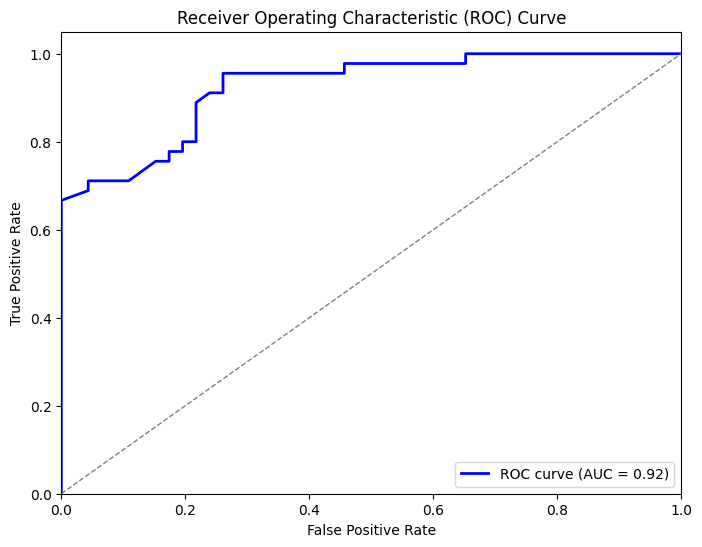

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Random Forest model
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(X_train, y_train)

# Predict probabilities for the positive class on test set
y_pred_proba = clf_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Adding Hyperparameter Tuning:

In [40]:
from sklearn.model_selection import GridSearchCV

#  Hyperparameter tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Params for Random Forest:", grid_search.best_params_)

Best Params for Random Forest: {'max_depth': 20, 'n_estimators': 200}


### Model Interpretation:

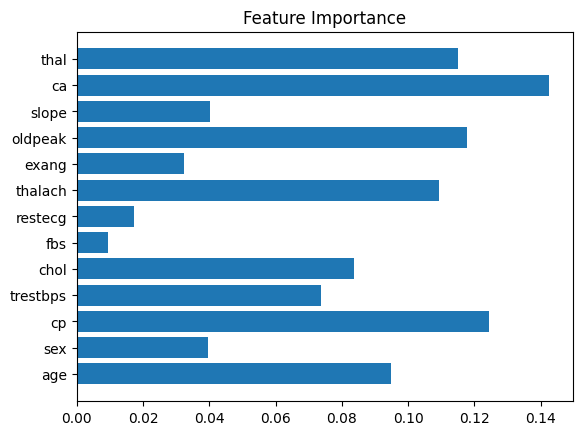

In [43]:
clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(X_train, y_train)  # Train the model first

importances = clf_rf.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.show()

### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
scores = cross_val_score(clf_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")


Cross-validation scores: [0.81395349 0.8372093  0.83333333 0.78571429 0.88095238]


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler

new_patient_data = [
    45, 1, 140, 230, 0, 150, 200, 2, 1, 1, 3, 0, 1
]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

clf_logistic = LogisticRegression(random_state=100)
clf_logistic.fit(X_train_scaled, y_train)

clf_rf = RandomForestClassifier(random_state=100)
clf_rf.fit(X_train_scaled, y_train)

new_patient_data_scaled = scaler.transform([new_patient_data])

prediction_logistic = clf_logistic.predict(new_patient_data_scaled)
probability_logistic = clf_logistic.predict_proba(new_patient_data_scaled)

prediction_rf = clf_rf.predict(new_patient_data_scaled)
probability_rf = clf_rf.predict_proba(new_patient_data_scaled)

print(f"Logistic Regression Prediction: {prediction_logistic[0]}")
print(f"Logistic Regression Probability of Heart Disease: {probability_logistic[0][1]}")

print(f"Random Forest Prediction: {prediction_rf[0]}")
print(f"Random Forest Probability of Heart Disease: {probability_rf[0][1]}")

Logistic Regression Prediction: 1
Logistic Regression Probability of Heart Disease: 1.0
Random Forest Prediction: 1
Random Forest Probability of Heart Disease: 0.64


c:\Users\lakna\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
